1. [API Gateway - Caching](#API-Gateway---Caching)
2. [API Gateway - Cache Invalidate](#API-Gateway---Cache-Invalidate)
3. [Hands On - API cache Invalidation at Stage Level](#Hands-On---API-cache-Invalidation-at-Stage-Level)
4. [Hands On - API cache Invalidation at Method Level](#Hands-On---API-cache-Invalidation-at-Method-Level)
5. [API Gateway - Security](#API-Gateway---Security)
6. [API Gateway Authorization & Authentication](#API-Gateway-Authorization-&-Authentication)
7. [Hands On - API Gateway Authentication & Authorization](#Hands-On---API-Gateway-Authentication-&-Authorization)

#### API Gateway - Caching:
- Used to reduce the number of calls to the API
- Possible to override cache setting for each method
- Caching is defined at stage level
- TTL: 300 seconds (default) min: 0 sec, max: 3600 sec
- Cache is encrypted
- cache capacity is between 0.5 GB to 237 GB
- Caching is expensive and used mostly in production

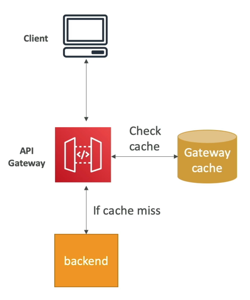

In [1]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/caching.jpeg')
new_image = img.resize((250, 300))
display(new_image)

#### API Gateway - Cache Invalidate:
- ability to flush the entire cache immediately
- clients can invalidate cache
    - header: Cache-control:max-age=0 (if proper IAM permissions are granted)
- If we do not specify the API cache invalidation policy or check the required authorization option, then any client can perform API cache invalidation

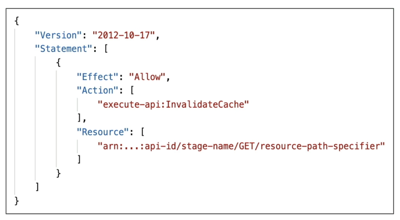

In [5]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/iam.jpeg')
new_image = img.resize((400, 220))
display(new_image)

#### Hands On - API cache Invalidation at Stage Level:
- Go to API Gateway console
- Go to API option (left-side)
    - Go to Stage option
        - Choose any stage
            - Edit Stage details
                - Enable API Cache
                    - Cache capacity
                    - Encrypt cache data
                    - Cache TTL
                    - Per Key Cache Invalidation (based on specific key value, we can invalidate certain parts of the API cache)
                        - Require Authorization
                            - Unauthorized request handling
                                - Ignore cache control header
                                - Ignore cache control header and add a warning message in response header
                                - Fail the request with a 403 Unauthorized response


#### Hands On - API cache Invalidation at Method Level:
- Go to API Gateway console
- Go to API option (left-side)
    - Go to Stage option
        - Choose any stage
            - Choose any Resource and its method
                - Edit Method
                    - Enable Method Cache 
                        - Encrypt cache data
                        - Cache TTL
                        - Per Key Cache Invalidation (based on specific key value, we can invalidate certain parts of the API cache)
                            - Require Authorization
                                - Unauthorized request handling
                                    - Ignore cache control header
                                    - Ignore cache control header and add a warning message in response header
                                    - Fail the request with a 403 Unauthorized response


#### API Gateway - Security:
- User authentication
    - IAM Roles (internal applications)
    - Cognito (external mobile users)
    - Custom Authorizer (write own logic)

- HTTPS Security:
    - Custom Domain Name HTTPS Security via integration with AWS Certificate Manager
    - If using Edge Optimized endpoint, then certificate must be in us-east-1
    - If using Regional endpoint, then certificate must be in same region as API Gateway
    - Must setup CNAME or A-alias record in Route53 to point the domain and API Gateway


#### API Gateway Authorization & Authentication:

IAM Permissions:
- IAM User/Group/Role = Authentication ; IAM Policy = Authorization
    - good when used with the AWS services
- Client send a REST API request with Sigv4 signed IAM credentials to API gateway in the headers
- API Gateway verifies the signature and the IAM Policy for permissions and then calls the backend service

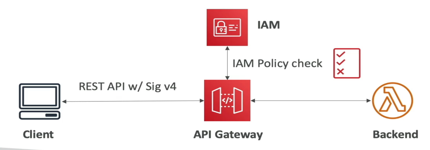

In [1]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/IAMpermissions.jpeg')
new_image = img.resize((430, 150))
display(new_image)

Resource Policy: (can be combined with IAM permissions)
- Similar Lambda Resource Policy
- Allows for cross account access (combined with IAM security)
- Allows specific source IP address
- Allows VPC endpoints

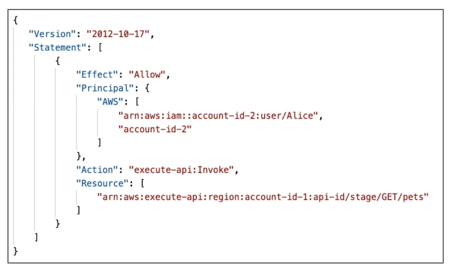

In [2]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/resourcepolicy.jpeg')
new_image = img.resize((450, 270))
display(new_image)

Cognito User Pools: (database of user at high level)
- Cognito fully manages the user lifecycle, token expires automatically
- API Gateway verifies identity automatically from AWS Cognito
- No custom implementation required
- Authentication = Cognito ; Authorization = API Gateway Methods

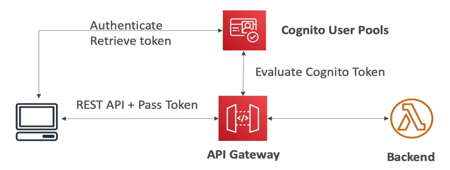

In [3]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/cognito.jpeg')
new_image = img.resize((450, 170))
display(new_image)

Lambda Authorizer: (formerly custom authorizer)
- Token based authorizer (bearer token), eg: JWT, OAuth
- When we pass a parameter-based Lambda authorizer request, we can include headers, query strings, stage var in the request
- Lambda must return an IAM policy for the user that made the request and the result policy is cached
- Authentication: External ; Authorization: Lambda Function

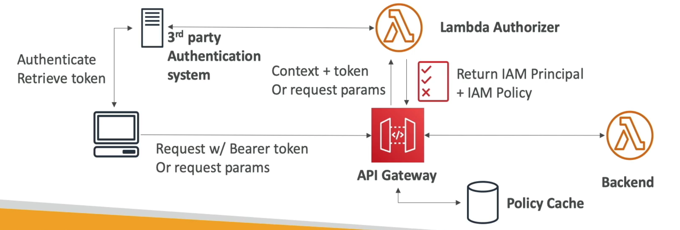

In [4]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/lambdaauthorizer.jpeg')
new_image = img.resize((680, 230))
display(new_image)

The Above process explained:
- The client first send a request to 3rd Party Authentication System to retrieves the JWT/OAuth token, etc
- Then, the retrieved token is sent as a request with the headers or request parameters to API Gateway
- The API Gateway invokes the Lambda Authorizer (Lambda function), the function will have custom code to communicate with the external 3rd party Authentication App and verify the token
- Once the token is verified successfully, then the AWS Lambda Authorizer creates IAM Principal and IAM Policy document
- Now the API Gateway with the IAM permissions will be store at the Policy Cache (for frequent access)
- Finally, the API Gateway has the necessary permission to invoke the destination lambda function

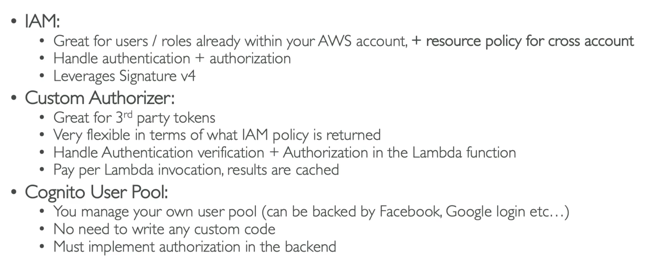

In [5]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/summary.jpeg')
new_image = img.resize((650, 270))
display(new_image)

#### Hands On - API Gateway Authentication & Authorization:
- Go to API Gateway console
    - Go to APIs option (left-side)
        - Go into any one of the created APIs
            - Choose any Resource and its method
                - Go to Method request
                    - Edit
                        - Authorization
                            - AWS_IAM
                        - Request Validator
                        - API Key required checkbox
        - Go to Resource Policy
            - Create Policy
                - Example Policy
                - Template
                    - AWS account allow list
                    - IP Range deny list
                    - Source VPC allow list
        - Go to Authorizer (for custom authorizer - lambda based or cognito)
            - Name
            - Type
                - Lambda
                    - Lambda ARN
                    - Lambda execution Role
                    - Lambda event payload
                        - Token
                        - Request
                        - Token Source (enter header that contains authorization token)
                        - Token validation (regex to validate authorization token)
                        - Authorization Caching
                        - TTL
                - Cognito
                    - Choose Cognito user pool
                    - Token Source (enter header that contains authorization token)
                    - Token validation (regex to validate authorization token)

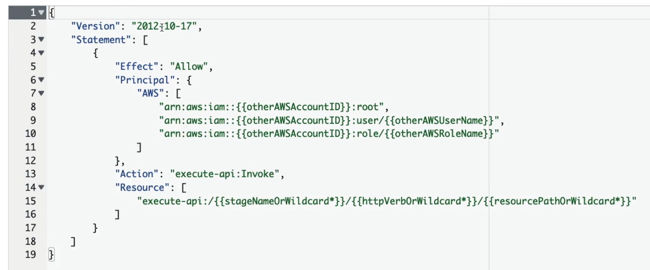

In [6]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/allow_list.jpeg')
new_image = img.resize((650, 270))
display(new_image)

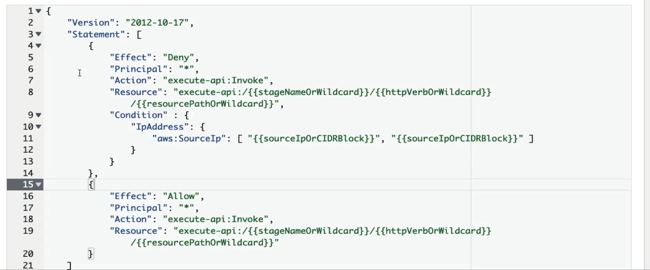

In [7]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/deny_list.jpeg')
new_image = img.resize((650, 270))
display(new_image)

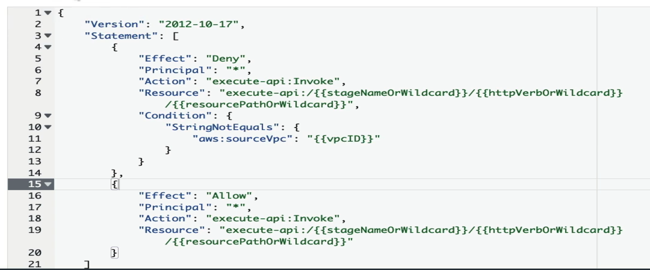

In [8]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/vpc_allow_list.jpeg')
new_image = img.resize((650, 270))
display(new_image)